Author: Hanqing Qi \
Project: CSE 360 Lab 3 \
Last Updated: 2022-02-13-12:53

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML

# Perfect Sensor
def sense(x):
    return x

# Simulation
def simulate(Δt,x , dx, dy):
    x[0] += Δt * dx
    x[1] += Δt * dy
    return x


In [87]:
def twoDcontrol(ex,ey,K):
    dx = K*ex
    dy = K*ey
    return np.array([dx, dy])

def main(K):
    # Initial Conditions
    total_time = 20
    Δt = 0.01    # Time step for more precise animation
    time = np.linspace(0.,total_time, int(total_time / Δt) + 1)  # Time interval

    x = np.array([4., 5.]) # Start point
    x_log = [np.copy(x)] # Record of the trajectory
    destination = np.array([2., 10.]) # Destination

    # Simulation
    for t in time:
        x = sense(x)
        # print(x)
        ex = destination[0] - x[0]
        ey = destination[1] - x[1]
        # print(ex,ey)
        dx,dy = twoDcontrol(ex,ey,K)
        # print(dx,dy)
        x = simulate(Δt, x, dx, dy)
        x_log.append(np.copy(x))

    x_log = np.array(x_log)

    # remove the last element of x_log
    x_log = x_log[:-1]

    # Plot x and y with respect to time
    plt.plot(time, x_log[:,0], label='x')
    plt.plot(time, x_log[:,1], label='y')
    plt.title('K = ' + str(K))
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.legend()
    plt.show()

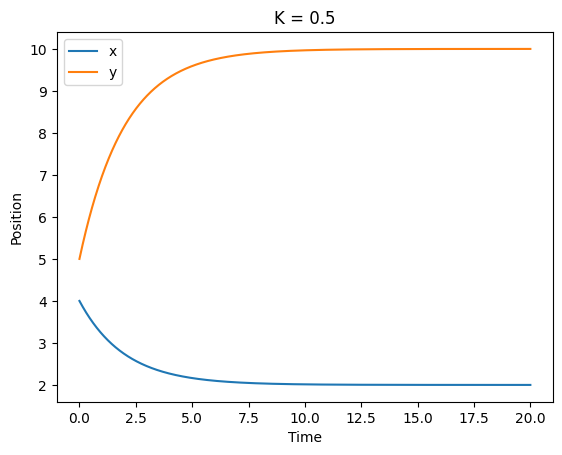

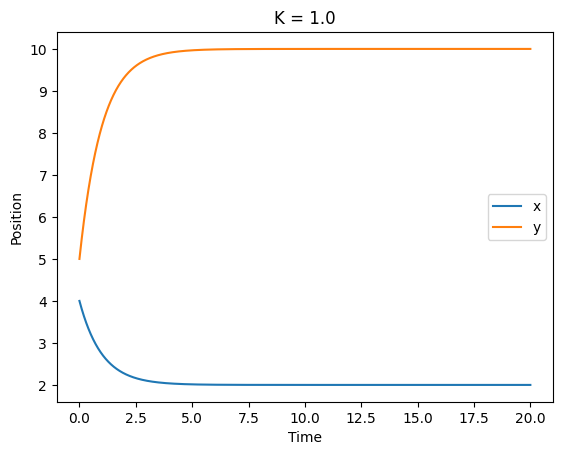

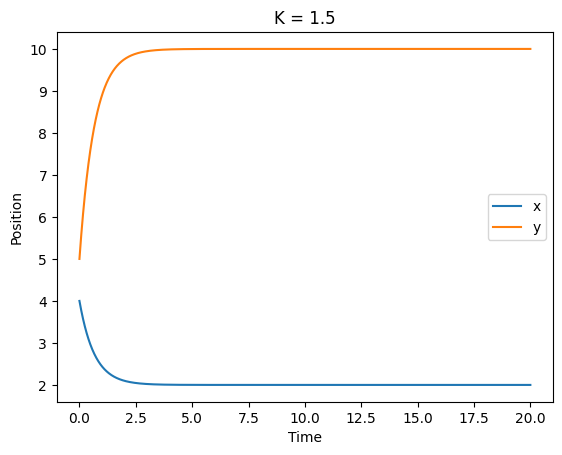

In [88]:
main(0.5)
main(1.0)
main(1.5)